In [13]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

In [14]:
w11, w12 = -1,1
w21, w22 = -1,1
w31, w32 = -1,1
b1, b2, b3 = -1,1,-1

In [15]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

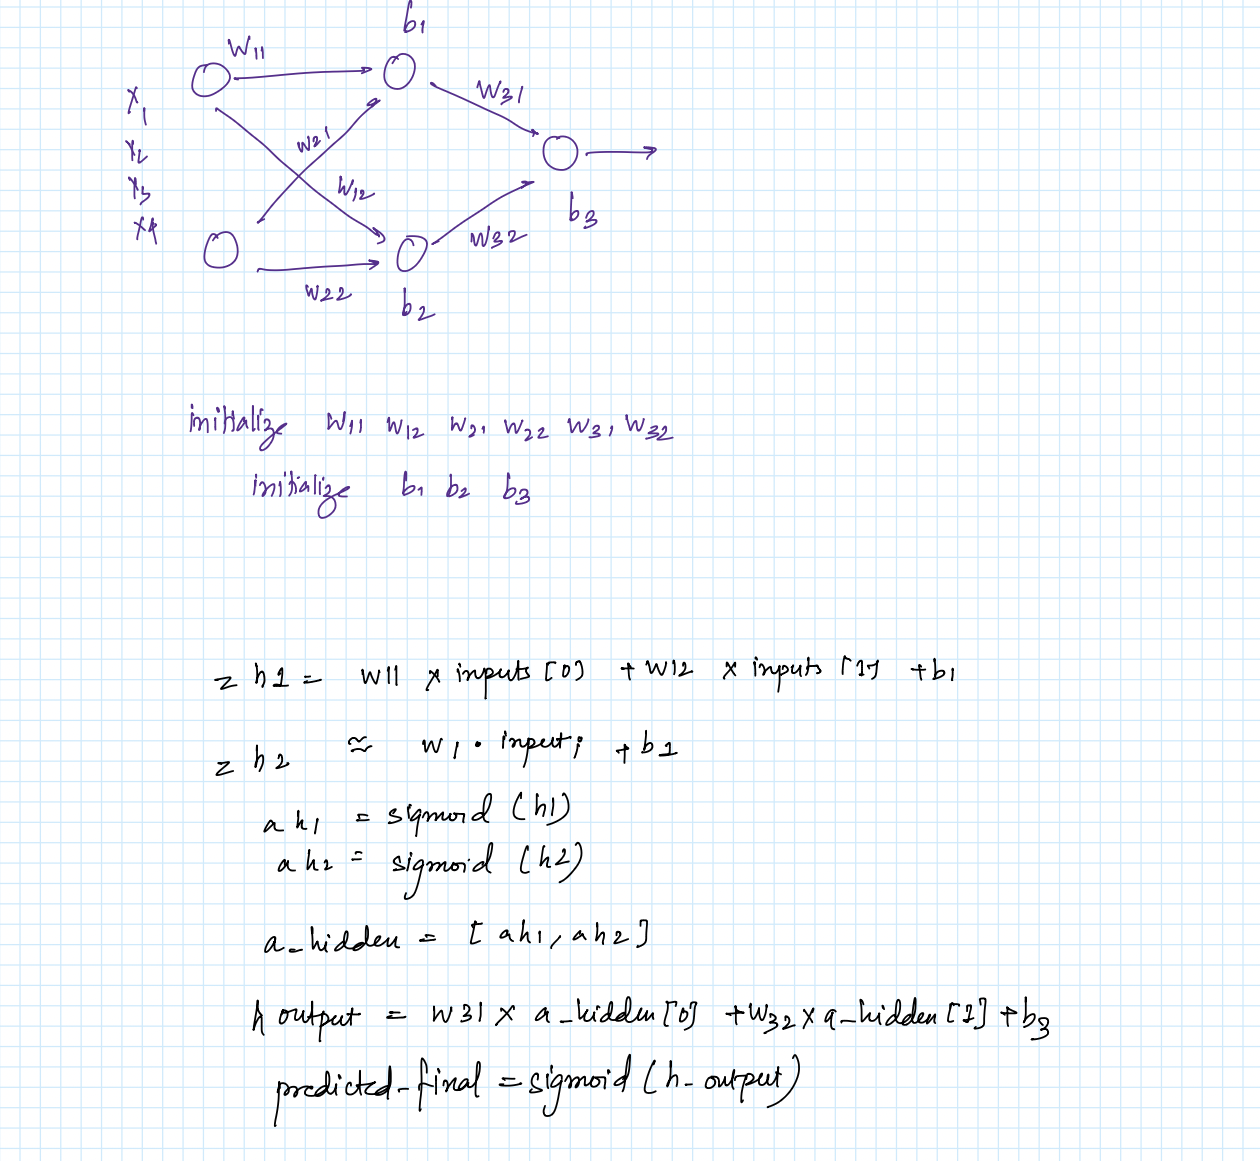

In [16]:
def forward(input):
    h1 = w11 * input[0] + w12 * input[1] + b1
    h2 = w21 * input[0] + w22 * input[1] + b2

    a_h1 = sigmoid(h1)
    a_h2 = sigmoid(h2)

    a_hidden = np.array([a_h1, a_h2])

    h_output = w31 * a_hidden[0] + w32 * a_hidden[1] + b3
    predicted_forward = sigmoid(h_output)
    return predicted_forward, a_hidden

In [17]:
input = [0,1]

In [18]:
print(forward(input))

(0.3499627560670681, array([0.5       , 0.88079708]))


In [19]:
predicted, hidden = forward(input)

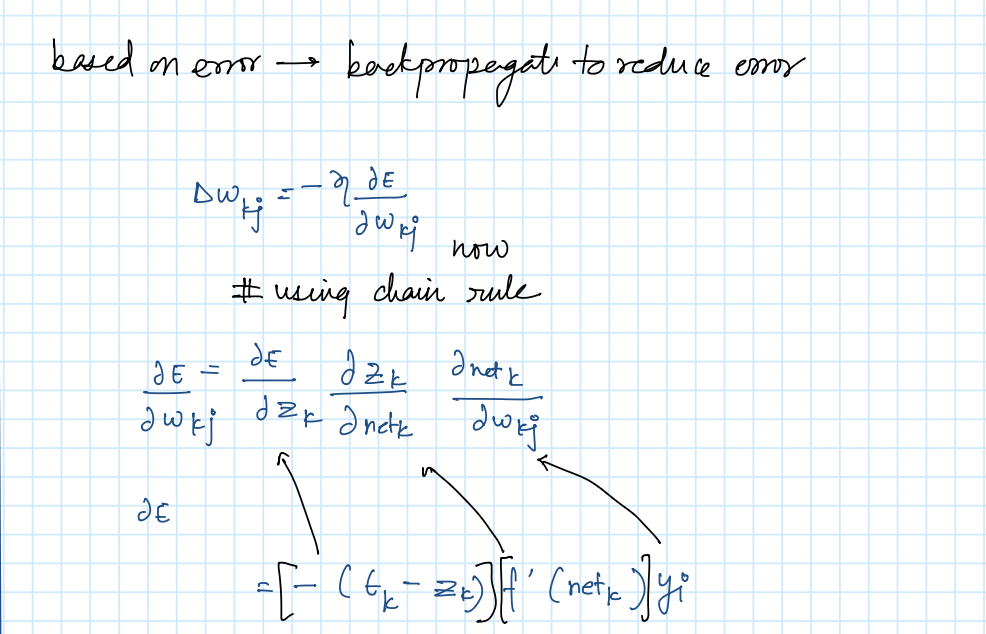

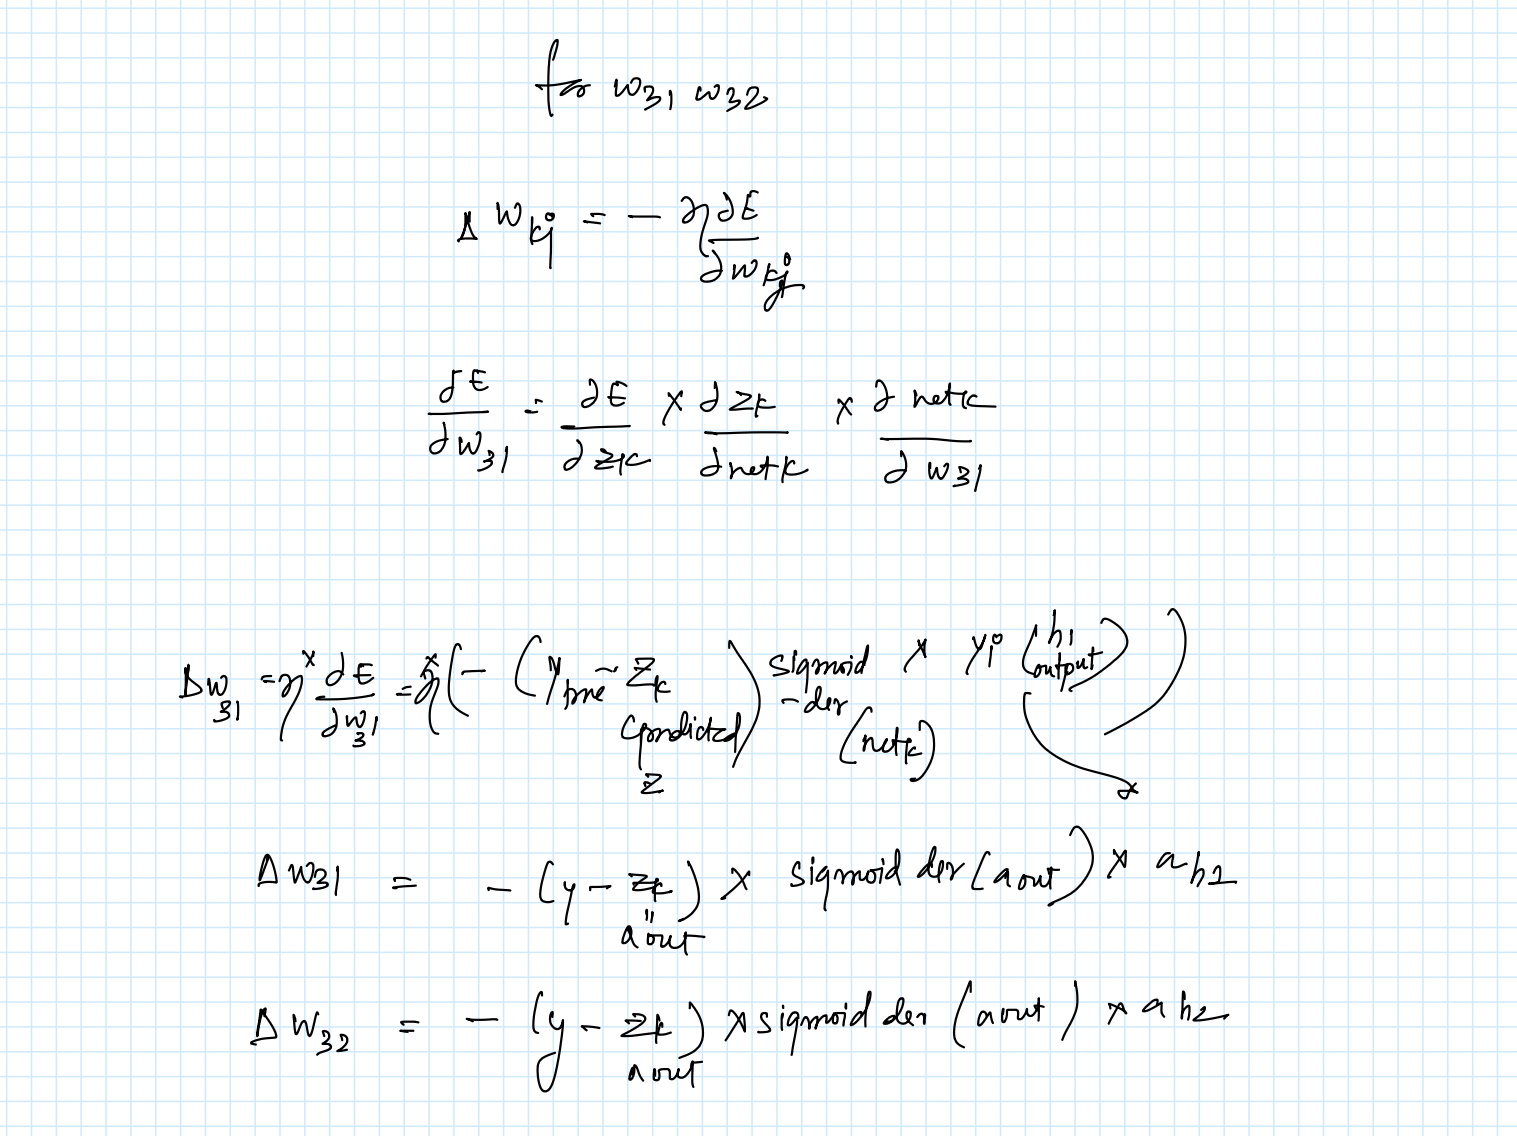

In [20]:
def sigmoid_derivative(z):
    result = (z) * (1-z)
    return result

In [21]:
dw31 = -1 * (y - predicted) * sigmoid_derivative(predicted) * hidden[0]
dw32 = -1 * (y - predicted) * sigmoid_derivative(predicted) * hidden[1]
db3 = sigmoid_derivative(predicted)

dw31,dw32,db3

(array([ 0.03980631, -0.0739381 , -0.0739381 ,  0.03980631]),
 array([ 0.07012256, -0.13024893, -0.13024893,  0.07012256]),
 0.22748882543300988)

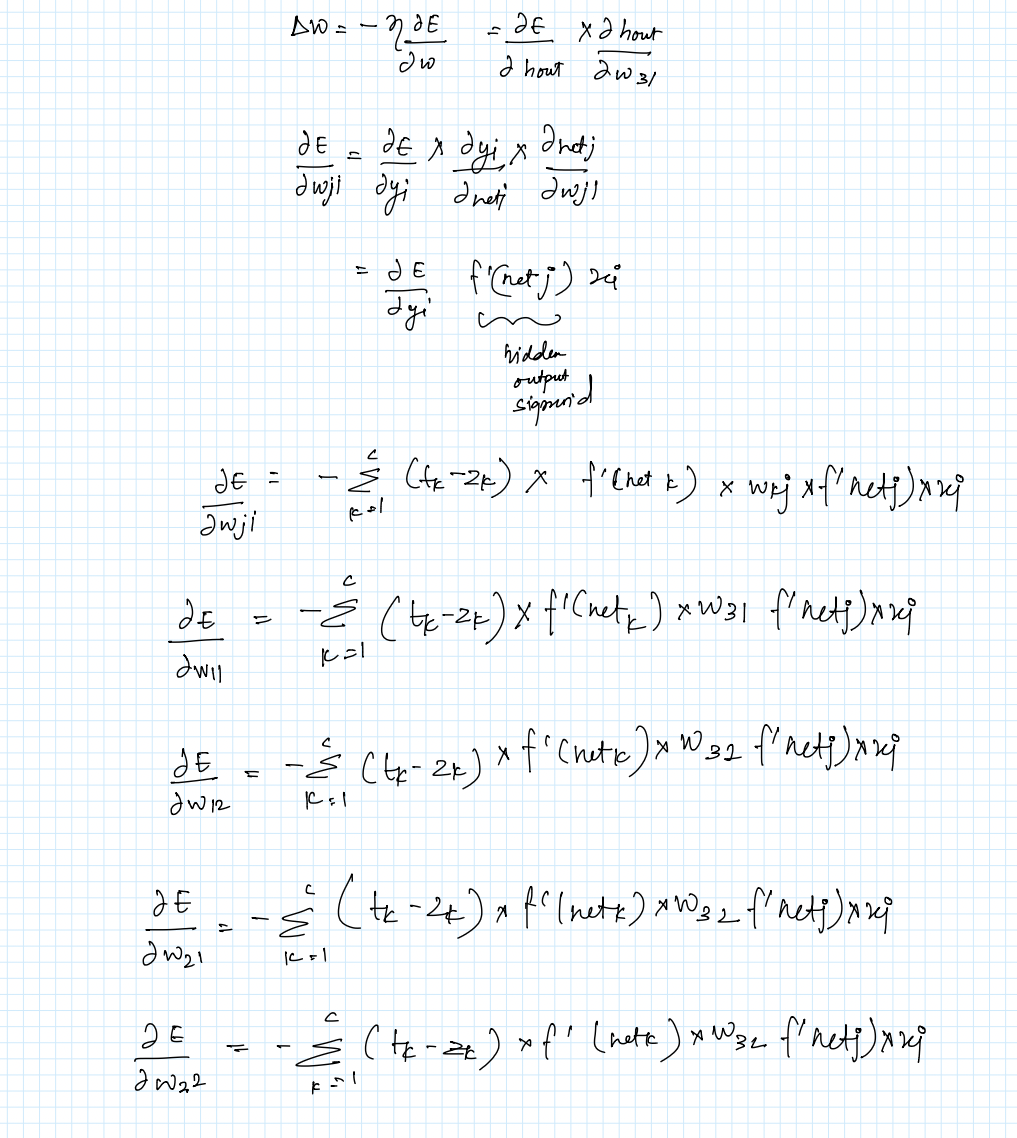

In [22]:
dw11 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0]) * input[0]
dw12 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0]) * input[1]
dw21 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w32 * sigmoid_derivative(hidden[1]) * input[0]
dw22 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w32 * sigmoid_derivative(hidden[1]) * input[1]
db1 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0])
db2 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w32 * sigmoid_derivative(hidden[1])
dw11,dw12,dw21,dw22,db1,db2

(array([-0.,  0.,  0., -0.]),
 array([-0.01990315,  0.03696905,  0.03696905, -0.01990315]),
 array([ 0., -0., -0.,  0.]),
 array([ 0.00835881, -0.01552605, -0.01552605,  0.00835881]),
 array([-0.01990315,  0.03696905,  0.03696905, -0.01990315]),
 array([ 0.00835881, -0.01552605, -0.01552605,  0.00835881]))

In [23]:
eta = 0.5

In [24]:
w31 -= eta * dw31
w32 -= eta * dw32
w11 -= eta * dw11
w12 -= eta * dw12
w21 -= eta * dw21
w22 -= eta * dw22
b1 -= eta * db1
b2 -= eta * db2
b3 -= eta * db3